In [347]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/star-dataset/6 class csv.csv


In [348]:
df=pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

In [349]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [351]:
np.unique(df["Star color"])

array(['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue white ',
       'Blue-White', 'Blue-white', 'Orange', 'Orange-Red',
       'Pale yellow orange', 'Red', 'White', 'White-Yellow', 'Whitish',
       'Yellowish', 'Yellowish White', 'white', 'yellow-white',
       'yellowish'], dtype=object)

In [352]:
df["Star color"] = df["Star color"].str.strip()
np.unique(df["Star color"])

array(['Blue', 'Blue White', 'Blue white', 'Blue-White', 'Blue-white',
       'Orange', 'Orange-Red', 'Pale yellow orange', 'Red', 'White',
       'White-Yellow', 'Whitish', 'Yellowish', 'Yellowish White', 'white',
       'yellow-white', 'yellowish'], dtype=object)

In [353]:
df["Star color"] = df["Star color"].str.strip()
df['Star color'] = df['Star color'].replace(['Blue White', 'Blue white', 'Blue-White', 'Blue-white'], 'blue-white')
df['Star color'] = df['Star color'].replace(['White-Yellow', 'Yellowish', 'Yellowish White', 'yellow-white', 'yellowish'], 'yellow-white')
df['Star color'] = df['Star color'].replace('White', 'white')
np.unique(df["Star color"])

array(['Blue', 'Orange', 'Orange-Red', 'Pale yellow orange', 'Red',
       'Whitish', 'blue-white', 'white', 'yellow-white'], dtype=object)

In [354]:
order_map = {'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
df["mapped_spec"] = df["Spectral Class"].map(order_map)

star_color_label = {'Blue': 0, 'Orange': 1, 'Orange-Red': 2, 'Pale yellow orange': 3, 'Red': 4, 'Whitish': 5, 'blue-white': 6, 'white': 7, 'yellow-white': 8}
df["color_label"] = df["Star color"].map(star_color_label)

star_color_map = {0 : 'blue', 1 : 'orange', 2 : 'orangered', 3 : 'gold', 4 : 'red', 5 : 'lightgray', 6 : 'lightblue', 7 : 'white', 8 : 'lightyellow'}

df["color_label"].value_counts()
np.unique(df["color_label"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

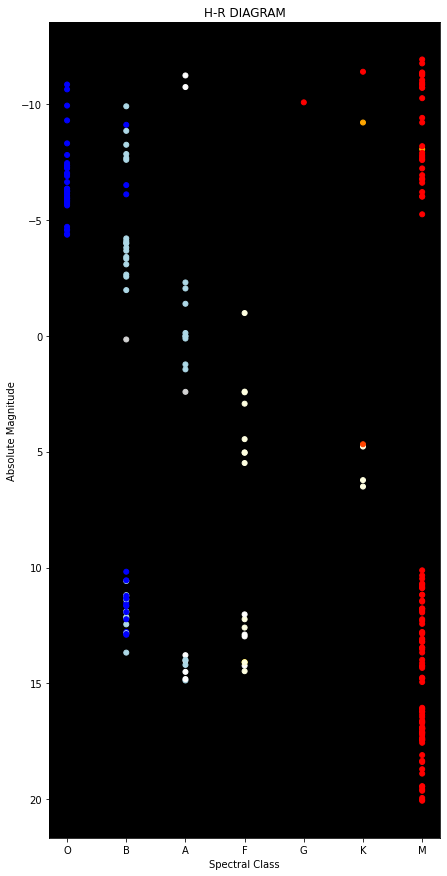

In [355]:
fig, ax = plt.subplots(figsize=(7,15))
ax.set_facecolor('black')

plt.gca().invert_yaxis()
ax.set_title("H-R DIAGRAM")
ax.set_xlabel("Spectral Class")
ax.set_ylabel("Absolute Magnitude")
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])

ax.scatter(df["mapped_spec"], df["Absolute magnitude(Mv)"], s=25, c=df['color_label'].map(star_color_map))
